## Problem Statement : 

### Text classification 

### sentiment analysis 

In [1]:
df = pd.read_csv("spam_clean.csv")

<IPython.core.display.Javascript object>

In [2]:
df

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df["message"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [4]:
df["message"][7]

"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"

In [5]:
df["message"][25]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [6]:
df['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

## Data Preprocessing : 

    reduce unique words by converting all the letters into lower case. 
    

## Tockenization : 
    Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. 


    The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words). Here’s an example of a string of data:  


    “What restaurants are nearby?“


    In order for this sentence to be understood by a machine, tokenization is performed on the string to break it into individual parts. With tokenization, we’d get something like this:  


    ‘what’ ‘restaurants’ ‘are’ ‘nearby’  

https://www.tokenex.com/blog/ab-what-is-nlp-natural-language-processing-tokenization/

    remove punctiations.
         . @ | ! / \ , = etc. 
    stopword removal .

In [7]:
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords

In [8]:
# nltk.download('punkt')

In [9]:
sw = set(stopwords.words("english"))
# there are the words who have no sentiments 
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
def get_clean_email(email):
    email = email.lower()
    import re
    pattern = "[^a-z ]+"
    repl = ""
    string = email
    eml = re.sub(pattern, repl, string).strip()
    eml = word_tokenize(eml)           # convert sentense into words list 
    
    eml = [w for w in eml if w not in sw]
    return " ".join(eml)

In [11]:
email = "Hi !! ,.. my name IS SunnY :) -28-10-1991"
email = get_clean_email(email)
email

'hi name sunny'

In [12]:
df["cleaned_message"]  = df["message"].apply(get_clean_email)

In [13]:
df["type"] = df["type"].astype("category").cat.codes

In [14]:
df

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,0,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [15]:
df["message"][15]

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [16]:
df["cleaned_message"][15]

'xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl'

## train test split 

In [17]:
df["type"].value_counts(normalize=True)

0    0.865937
1    0.134063
Name: type, dtype: float64

In [18]:
df["type"].value_counts(normalize=False)

0    4825
1     747
Name: type, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_X_train, df_X_test, y_train, y_test = train_test_split( df["cleaned_message"],
                                                     df["type"],
                                                    test_size=0.25,
                                                    random_state=42)

In [21]:
df_X_train

4281                                               u call
585               tell u headache want use hour sick time
4545    never try alone take weight tear comes ur hear...
3034    rajipls favour pls convey birthday wishes nimy...
2758                                         time im prob
                              ...                        
3772        came hostel going sleep plz call class hrishi
5191                                 sorry ill call later
5226                prabhaim sorydarealyfrm heart im sory
5390                             nt joking seriously told
860                                        work going min
Name: cleaned_message, Length: 4179, dtype: object

In [22]:
df_X_train.shape,df_X_test.shape

((4179,), (1393,))

In [23]:
y_train.shape,y_test.shape

((4179,), (1393,))

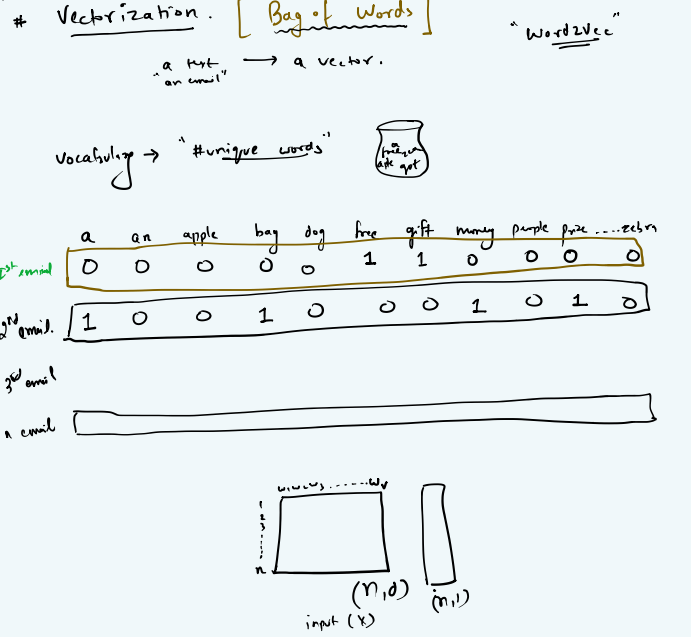

# Vectorization 

## BagOfWord

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer = CountVectorizer()


# CountVectorizer(
#     *,
#     input='content',
#     encoding='utf-8',
#     decode_error='strict',
#     strip_accents=None,
#     lowercase=True,
#     preprocessor=None,
#     tokenizer=None,
#     stop_words=None,
#     token_pattern='(?u)\\b\\w\\w+\\b',
#     ngram_range=(1, 1),
#     analyzer='word',
#     max_df=1.0,
#     min_df=1,
#     max_features=None,
#     vocabulary=None,
#     binary=False,
#     dtype=<class 'numpy.int64'>,
# )


In [26]:
vectorizer.fit(df_X_train)

CountVectorizer()

In [27]:
X_train = vectorizer.transform(df_X_train)
X_test = vectorizer.transform(df_X_test)

In [28]:
X_train

<4179x7093 sparse matrix of type '<class 'numpy.int64'>'
	with 33926 stored elements in Compressed Sparse Row format>

In [29]:
X_test

<1393x7093 sparse matrix of type '<class 'numpy.int64'>'
	with 10126 stored elements in Compressed Sparse Row format>

In [34]:
X_train.nnz
# Number of stored values, including explicit zeros.
# number of non-zeros 

33926

In [36]:
# total numbers 
33926/(4179 * 7093) # % of total words .

0.0011445382910065692

In [37]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
X_train.toarray().shape

(4179, 7093)

In [39]:
X_test.shape

(1393, 7093)

In [41]:
X_train.shape

(4179, 7093)